In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

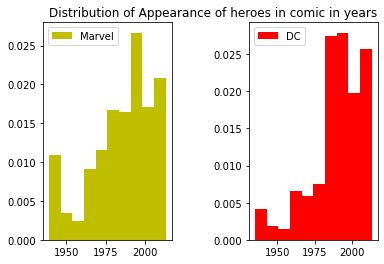

In [4]:
# function to read CSV
def readcsvdata(name):
    """
    This function reads the CSV data and returns
    """
    data = pd.read_csv(name)
    data.describe()
    return data


# function to read CSV
def preprocessdata(data):
    """
    This function prforms preprocessing of data
    """
    data.fillna(0)
    #find_missing_rows = data.isnull().any(axis = 1).sum()
    #data.dropna(axis = 0, inplace = True)
    return data


#Read the data for analysis
marveldata = readcsvdata("marvel-wikia-data.csv")
preprocessdata(marveldata)
dcdata = readcsvdata("dc-wikia-data.csv")
preprocessdata(dcdata)


# Plot appearences of marvel heroes
plt.figure(1)
plt.subplots_adjust(wspace = 0.6)
plt.subplot(1, 2, 1) 
plt.hist(marveldata['Year'], label="Marvel", density=True, color='y') 
plt.legend()

#Plot appearences of DC heroes
plt.figure(1)
plt.subplot(1, 2, 2) 
plt.hist(dcdata['YEAR'], label="DC", density=True, color='r')
plt.legend()
plt.title('Distribution of Appearance of heroes in comic in years', loc='right')
plt.show()





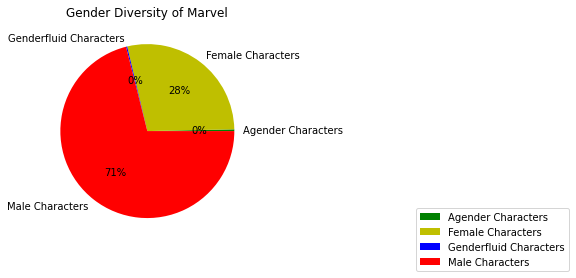

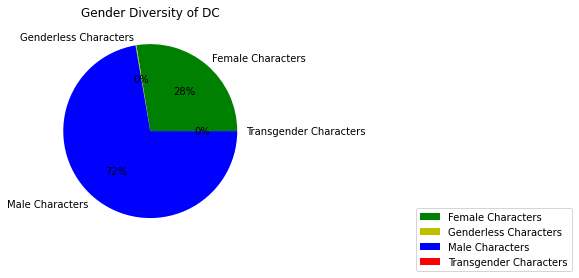

In [5]:
# function to read CSV
def setlegend_title_show(title):
    """ setting legend and title """
    plt.legend(bbox_to_anchor=(1.5,0), loc="lower right", bbox_transform=plt.gcf().transFigure)
    plt.title(title)
    plt.show()
    return

#pie chart of marvel and DC by gender diversity
#groupy gender
gendermarveldata = marveldata.groupby('SEX').sum()
genderdcdata = dcdata.groupby('SEX').sum()
names = ['Agender Characters','Female Characters', 'Genderfluid Characters', 'Male Characters']
values = gendermarveldata['APPEARANCES']

#print(values)
plt.figure(1)
plt.pie(values, labels=names, colors=['g', 'y', 'b', 'r'], autopct='%1.0f%%')
setlegend_title_show('Gender Diversity of Marvel')

names = ['Female Characters','Genderless Characters', 'Male Characters', 'Transgender Characters']
values = genderdcdata['APPEARANCES']
plt.figure(1)
plt.pie(values, labels=names, colors=['g', 'y', 'b', 'r'], autopct='%1.0f%%')
setlegend_title_show('Gender Diversity of DC')


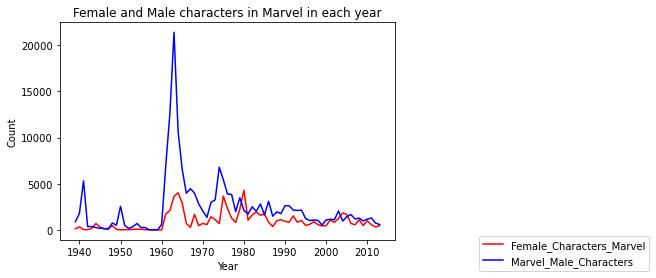

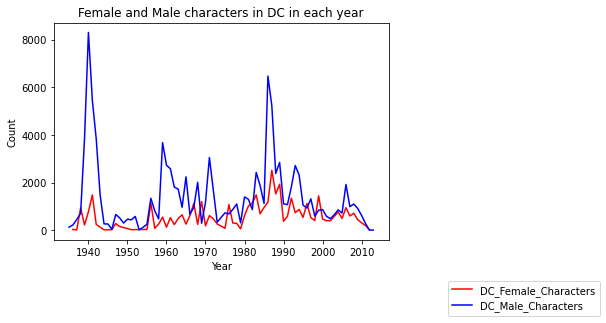

In [6]:
#Marvel Female and Male charaters diversity in year basis
female_characters_marvel_data = marveldata[marveldata.SEX == 'Female Characters']
male_characters_marvel_data = marveldata[marveldata.SEX == 'Male Characters']
year_marvel_female = female_characters_marvel_data.groupby('Year').sum()
year_marvel_male = male_characters_marvel_data.groupby('Year').sum()
#print(year_marvel_male)


plt.figure(1)
plt.plot(year_marvel_female['APPEARANCES'], label='Female_Characters_Marvel', color='red')
plt.plot(year_marvel_male['APPEARANCES'],label='Marvel_Male_Characters', color='blue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.5,0), loc="lower right", bbox_transform=plt.gcf().transFigure)
plt.title('Female and Male characters in Marvel in each year')
plt.show()

#DC Female and Male charaters diversity in year basis
female_characters_dc_data = dcdata[dcdata.SEX == 'Female Characters']
male_characters_dc_data = dcdata[dcdata.SEX == 'Male Characters']
year_dc_female = female_characters_dc_data.groupby('YEAR').sum()
year_dc_male = male_characters_dc_data.groupby('YEAR').sum()

plt.figure(1)
plt.plot(year_dc_female['APPEARANCES'],label ='DC_Female_Characters', color='red')
plt.plot(year_dc_male['APPEARANCES'],label ='DC_Male_Characters', color='blue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.4,0), loc="upper right", bbox_transform=plt.gcf().transFigure)
plt.title('Female and Male characters in DC in each year')
plt.show()


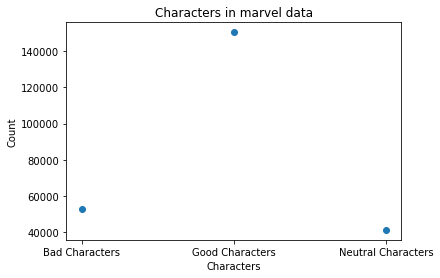

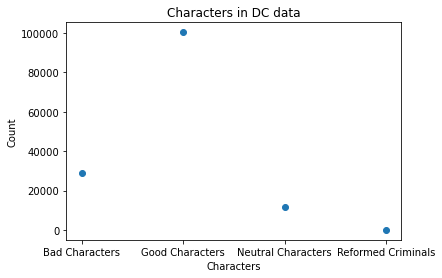

In [7]:
#Marvel and DC Character's count

align_marvel_data = marveldata.groupby('ALIGN').sum()    
names = ['Bad Characters','Good Characters', 'Neutral Characters']
plt.figure(1)
plt.xlabel('Characters')
plt.ylabel('Count')
plt.scatter(names , align_marvel_data['APPEARANCES'])
plt.title('Characters in marvel data')
plt.show()


align_dc_data = dcdata.groupby('ALIGN').sum()  
names = ['Bad Characters','Good Characters', 'Neutral Characters','Reformed Criminals' ]
plt.figure(1)
plt.xlabel('Characters')
plt.ylabel('Count')
plt.scatter(names , align_dc_data['APPEARANCES'])
plt.title('Characters in DC data')
plt.show()